In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/ITMO/test.zip

Archive:  /content/drive/MyDrive/ITMO/test.zip
   creating: test/Agaricus/
  inflating: test/Agaricus/224376.jpg  
  inflating: test/Agaricus/224377.jpg  
  inflating: test/Agaricus/224378.jpg  
  inflating: test/Agaricus/224379.jpg  
  inflating: test/Agaricus/224380.jpg  
  inflating: test/Agaricus/224381.jpg  
  inflating: test/Agaricus/224382.jpg  
  inflating: test/Agaricus/224451.jpg  
  inflating: test/Agaricus/224452.jpg  
  inflating: test/Agaricus/224453.jpg  
  inflating: test/Agaricus/224454.jpg  
  inflating: test/Agaricus/224974.jpg  
  inflating: test/Agaricus/224975.jpg  
  inflating: test/Agaricus/224976.jpg  
   creating: test/Amanita/
  inflating: test/Amanita/221958.jpg  
  inflating: test/Amanita/221983.jpg  
  inflating: test/Amanita/221984.jpg  
  inflating: test/Amanita/221985.jpg  
  inflating: test/Amanita/222103.jpg  
  inflating: test/Amanita/222104.jpg  
  inflating: test/Amanita/222105.jpg  
  inflating: test/Amanita/222106.jpg  
  inflating: test/Amanita/

In [3]:
!unzip /content/drive/MyDrive/ITMO/val.zip

Archive:  /content/drive/MyDrive/ITMO/val.zip
   creating: val/Agaricus/
  inflating: val/Agaricus/222640.jpg  
  inflating: val/Agaricus/222641.jpg  
  inflating: val/Agaricus/222642.jpg  
  inflating: val/Agaricus/222653.jpg  
  inflating: val/Agaricus/222654.jpg  
  inflating: val/Agaricus/222655.jpg  
  inflating: val/Agaricus/222789.jpg  
  inflating: val/Agaricus/222790.jpg  
  inflating: val/Agaricus/222791.jpg  
  inflating: val/Agaricus/223614.jpg  
  inflating: val/Agaricus/223615.jpg  
  inflating: val/Agaricus/223616.jpg  
  inflating: val/Agaricus/223617.jpg  
  inflating: val/Agaricus/223618.jpg  
  inflating: val/Agaricus/224371.jpg  
  inflating: val/Agaricus/224372.jpg  
  inflating: val/Agaricus/224373.jpg  
  inflating: val/Agaricus/224374.jpg  
  inflating: val/Agaricus/224375.jpg  
   creating: val/Amanita/
  inflating: val/Amanita/218531.jpg  
  inflating: val/Amanita/218636.jpg  
  inflating: val/Amanita/218637.jpg  
  inflating: val/Amanita/218655.jpg  
  inflat

In [4]:
!unzip /content/drive/MyDrive/ITMO/train.zip

Archive:  /content/drive/MyDrive/ITMO/train.zip
   creating: train/Agaricus/
  inflating: train/Agaricus/210026.jpg  
  inflating: train/Agaricus/210027.jpg  
  inflating: train/Agaricus/210028.jpg  
  inflating: train/Agaricus/210325.jpg  
  inflating: train/Agaricus/210326.jpg  
  inflating: train/Agaricus/210327.jpg  
  inflating: train/Agaricus/210328.jpg  
  inflating: train/Agaricus/210329.jpg  
  inflating: train/Agaricus/210330.jpg  
  inflating: train/Agaricus/210331.jpg  
  inflating: train/Agaricus/210332.jpg  
  inflating: train/Agaricus/210333.jpg  
  inflating: train/Agaricus/210749.jpg  
  inflating: train/Agaricus/210750.jpg  
  inflating: train/Agaricus/210751.jpg  
  inflating: train/Agaricus/210752.jpg  
  inflating: train/Agaricus/210753.jpg  
  inflating: train/Agaricus/210754.jpg  
  inflating: train/Agaricus/210755.jpg  
  inflating: train/Agaricus/210756.jpg  
  inflating: train/Agaricus/210757.jpg  
  inflating: train/Agaricus/210758.jpg  
  inflating: train/Ag

In [6]:
import tensorflow as tf
from tensorflow.python.framework.config import list_physical_devices, set_memory_growth
import os

In [5]:
import pandas as pd
import glob
import os
import seaborn as sns
# import keras.applications.efficientnet as efc
from keras.applications import *
import zipfile
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from keras import layers
from keras import Model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import shutil
from tqdm import tqdm

IMG_SIZE = 224

In [7]:
TRAIN_DIR='/content/train'
TEST_DIR='/content/test'
VAL_DIR='/content/val'
WORKING_DIR='/content/working'


In [8]:
df = pd.read_csv('/content/drive/MyDrive/ITMO/MO MI images - imagesAndNames.csv')
df.index.name = 'index'

jpgFilenamesList = glob.glob('/content/train/**/*.jpg')
jpgFilenamesList += glob.glob('/content/test/**/*.jpg')
jpgFilenamesList += glob.glob('/content/val/**/*.jpg')


photos = []
for i in jpgFilenamesList:
    photos.append(int((os.path.basename(i))[:-4]))

df_exist_photos = df[df.index.isin(photos)]

families = df_exist_photos['name'].str.split(n=1).str[0].value_counts()[:1000]

families

Russula        1382
Amanita         720
Cortinarius     430
Lactarius       363
Tricholoma      293
Psilocybe       276
Boletus         273
Inocybe         266
Mycena          248
Entoloma        238
Suillus         210
Ganoderma       179
Hypomyces       161
Lycoperdon      147
Pluteus         142
Psathyrella     142
Lactifluus      142
Caloplaca       140
Agaricus        131
Hygrocybe       130
Name: name, dtype: int64

In [9]:
df_exist_photos['name'] = df_exist_photos['name'].str.split(n=1).str[0]
top = df_exist_photos[df_exist_photos.name.isin(families.index)]

top= top.rename_axis('index').reset_index()
top = top[['index', 'name']]
top.dropna(inplace=True)

top

<ipython-input-9-abca6d8b76fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exist_photos['name'] = df_exist_photos['name'].str.split(n=1).str[0]


,index,name
0,210005,Inocybe
1,210006,Inocybe
2,210007,Inocybe
3,210008,Inocybe
4,210009,Inocybe
...,...,...
6008,224995,Hypomyces
6009,224996,Hypomyces
6010,224997,Hypomyces
6011,224998,Tricholoma


In [10]:
physical_devices = list_physical_devices('GPU')
print(f'Number of GPUs available: {len(physical_devices)}')

if len(physical_devices) > 0:
    set_memory_growth(physical_devices[0], True)

Number of GPUs available: 1


In [ ]:
# from PIL import Image
# import io

# for img in glob.glob(f"{TRAIN_DIR}/**/*.jpg"):
#   byteImgIO = io.BytesIO()
#   byteImg = Image.open(img)
#   byteImg.save(byteImgIO, "JPEG")

In [11]:
from tensorflow.keras.applications.efficientnet import preprocess_input

# Create image datasets
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input)\
                    .flow_from_directory(directory=TRAIN_DIR,
                                         target_size=(IMG_SIZE, IMG_SIZE),
                                         class_mode='categorical',
                                         batch_size=64,
                                         shuffle=True)
valid_generator = ImageDataGenerator(preprocessing_function=preprocess_input)\
                    .flow_from_directory(directory=VAL_DIR,
                                         target_size=(IMG_SIZE, IMG_SIZE),
                                         class_mode='categorical',
                                         batch_size=64,
                                         shuffle=True)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)\
                    .flow_from_directory(directory=TEST_DIR,
                                         target_size=(IMG_SIZE, IMG_SIZE),
                                         class_mode='categorical',
                                         batch_size=64,
                                         shuffle=False)

Found 4502 images belonging to 20 classes.
Found 901 images belonging to 20 classes.
Found 610 images belonging to 20 classes.


In [12]:
# IF model.fit() FAILS WITH ERROR
# cannot identify image file <_io.BytesIO object at 0x 0C910BD0>?

import glob
from PIL import Image

imgs_names = glob.glob(f"{TRAIN_DIR}/**/*.jpg")

for imgname in imgs_names:
    img = Image.open(imgname)
    if img is None:
        print(imgname)

# Delete broken image file
# ! rm -fv <imgname>

#! DO NOT FORGET TO RELOAD THE CELL WITH TRAIN_GENERATOR !

In [14]:
# Pretrained EfficientNetB7 image classification model without final layers
feature_model = tf.keras.applications.EfficientNetB7(weights='imagenet',
                                                     include_top=False,
                                                     input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                                     pooling='avg')

num_classes = len(os.listdir(TRAIN_DIR))

# Construct a new model with the final dense layer for 9 classes
new_model = tf.keras.models.Sequential(
    [
        feature_model,
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ]
)

# Make all the layers from the original ResNet model untrainable
new_model.layers[0].trainable = False

# Metrics and optimizer
new_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'],
                  run_eagerly=True)

# Callbacks to be exercised during training
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                              patience=10,
                                              restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                                 factor=0.1,
                                                 mode='max',
                                                 cooldown=2,
                                                 patience=2,
                                                 min_lr=0)

258076736/258076736 [==============================] - 12s 0us/step


In [ ]:
from tensorflow.python.distribute.collective_all_reduce_strategy import CollectiveAllReduceExtended

# CollectiveAllReduceExtended._enable_check_health = False
CollectiveAllReduceExtended._enable_check_health = True
tf.data.experimental.enable_debug_mode()
tf.config.run_functions_eagerly(True)

num_train_samples = len(os.listdir(TRAIN_DIR))
num_validation_samples = len(os.listdir(VAL_DIR))
batch_size = 64

# Train new model:
history = new_model.fit(train_generator,
                        validation_data=valid_generator,
                        epochs=100,
                        steps_per_epoch = num_train_samples // batch_size,
                        validation_steps = num_validation_samples // batch_size,
                        verbose=2,
                        callbacks=[reduce_lr, early_stop])

In [14]:
def build_model(num_classes, img_size=IMG_SIZE):
    input = tf.keras.layers.Input(shape=(img_size, img_size, 3))
    model = tf.keras.applications.EfficientNetB3(include_top=False, input_tensor=input, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = tf.keras.layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = tf.keras.layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = tf.keras.layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    output = tf.keras.layers.Dense(num_classes, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(input, output, name="EfficientNet")
    # model.compile(
    #     optimizer='adam',
    #     loss="sparse_categorical_crossentropy",
    #     metrics=["sparse_categorical_accuracy"]
    # )

    model.compile(
        optimizer='adam',
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

def use_keras_new(path):
    num_classes = len(os.listdir(TRAIN_DIR))
    model = build_model(num_classes)

    num_train_samples = len(os.listdir(TRAIN_DIR))
    num_validation_samples = len(os.listdir(VAL_DIR))
    batch_size = 64

    history = model.fit(
        train_generator,
        validation_data=valid_generator,
        batch_size=batch_size,
        verbose=2,
        epochs=10
    )
    model.save_weights('model.h5')  # Save in HDF5
    return model, history

model, history = use_keras_new('data_train')

# If you want to use a pre-trained model:
#loaded_model = tf.keras.models.load_model("best_model")
#model = loaded_model

Epoch 1/10
71/71 - 72s - loss: 2.4693 - accuracy: 0.3490 - val_loss: 2.1177 - val_accuracy: 0.3696 - 72s/epoch - 1s/step
Epoch 2/10
71/71 - 47s - loss: 1.5539 - accuracy: 0.5395 - val_loss: 1.8767 - val_accuracy: 0.4484 - 47s/epoch - 659ms/step
Epoch 3/10
71/71 - 48s - loss: 1.2729 - accuracy: 0.6077 - val_loss: 1.7736 - val_accuracy: 0.4906 - 48s/epoch - 670ms/step
Epoch 4/10
71/71 - 50s - loss: 1.0989 - accuracy: 0.6579 - val_loss: 1.7425 - val_accuracy: 0.5050 - 50s/epoch - 700ms/step
Epoch 5/10
71/71 - 47s - loss: 0.9779 - accuracy: 0.6970 - val_loss: 1.7468 - val_accuracy: 0.5261 - 47s/epoch - 660ms/step
Epoch 6/10
71/71 - 51s - loss: 0.8947 - accuracy: 0.7226 - val_loss: 1.8076 - val_accuracy: 0.5228 - 51s/epoch - 713ms/step
Epoch 7/10
71/71 - 47s - loss: 0.8492 - accuracy: 0.7357 - val_loss: 1.8075 - val_accuracy: 0.5327 - 47s/epoch - 655ms/step
Epoch 8/10
71/71 - 50s - loss: 0.7813 - accuracy: 0.7601 - val_loss: 1.8358 - val_accuracy: 0.5361 - 50s/epoch - 702ms/step
Epoch 9/10


In [16]:
loss, accuracy = model.evaluate(test_generator,
                                    steps=11,
                                    verbose=2,
                                    use_multiprocessing=True,
                                    workers=2)
print(f'Model performance on test images:\nAccuracy = {accuracy}\nLoss = {loss}')

11/11 - 9s - loss: 1.9571 - accuracy: 0.4881 - 9s/epoch - 792ms/step
Model performance on test images:
Accuracy = 0.4881305694580078
Loss = 1.9570826292037964


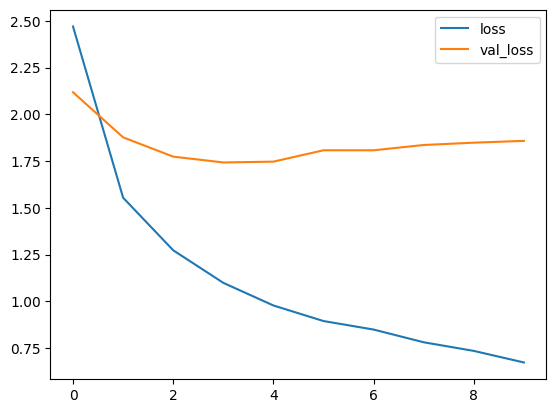

In [17]:
# Loss during training:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot();

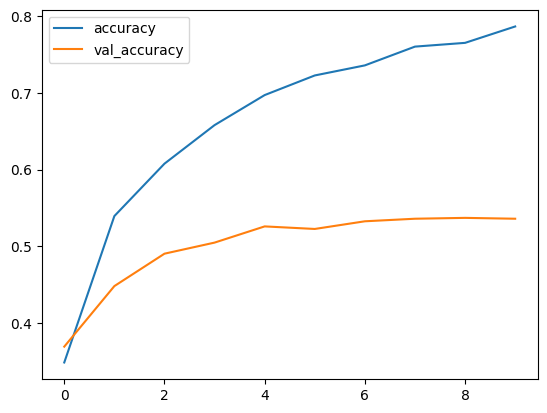

In [18]:
# Accuracy during training:
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();